# Исследование надежности заемщиков

Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Заказчик — кредитный отдел банка. Входные данные от банка — статистика о платёжеспособности клиентов. 

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.


### Описание данных:

- `children` — количество детей в семье;
- `days_employed` — общий трудовой стаж в днях;
- `dob_years` — возраст клиента в годах;
- `education` — уровень образования клиента;
- `education_id` — идентификатор уровня образования;
- `family_status` — семейное положение;
- `family_status_id` — идентификатор семейного положения;
- `gender` — пол клиента;
- `income_type` — тип занятости;
- `debt` — имел ли задолженность по возврату кредитов;
- `total_income` — ежемесячный доход;
- `purpose` — цель получения кредита.

## Изучение данных из файла

Откроем и изучим общую информацию о данных.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# сделаем настройку для удобства и наглядности

# снимем ограничение на количество столбцов
pd.set_option('display.max_columns', 50)

# снимем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', 120)

# игнорируем предупреждения
pd.set_option('chained_assignment', 'warn')
warnings.simplefilter(action='ignore', category=FutureWarning)

# выставим ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

# устанавим стиль графиков
sns.set(rc={'figure.dpi':200, 'savefig.dpi':300})   
sns.set_context('notebook') 
sns.set_style('ticks') 
sns.set_style('whitegrid')

In [3]:
# считаем данные из csv файла и сохраним его в переменную data
data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [4]:
# выведем 10 случайных строк на экран
data.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
6566,0,"-3,673.36",34,среднее,1,женат / замужем,0,F,компаньон,0,"62,001.39",сделка с подержанным автомобилем
14751,0,"-1,760.60",34,среднее,1,женат / замужем,0,M,сотрудник,0,"403,213.62",получение образования
10374,1,"-2,591.89",37,высшее,0,женат / замужем,0,F,госслужащий,0,"132,397.00",жилье
12828,0,NaN,47,высшее,0,женат / замужем,0,F,госслужащий,0,NaN,профильное образование
13923,1,"-2,463.81",36,среднее,1,женат / замужем,0,M,компаньон,0,"258,762.82",строительство жилой недвижимости
6859,1,-260.99,0,неоконченное высшее,2,гражданский брак,1,F,сотрудник,0,"128,246.65",покупка недвижимости
20213,2,"-6,924.91",56,Среднее,1,Не женат / не замужем,4,M,сотрудник,0,"135,240.97",покупка коммерческой недвижимости
11831,0,"-1,885.03",34,среднее,1,женат / замужем,0,M,компаньон,0,"328,873.89",недвижимость
18250,0,"-2,062.34",51,среднее,1,в разводе,3,M,сотрудник,0,"111,855.45",сделка с подержанным автомобилем
13912,0,"-2,673.91",49,среднее,1,женат / замужем,0,F,госслужащий,0,"438,831.31",получение высшего образования


In [5]:
# изучим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
# определим процент пропущенных значений в каждом столбце
data.isna().sum().sort_values(ascending=False) \
    / data.shape[0] * 100

days_employed      10.10
total_income       10.10
children            0.00
dob_years           0.00
education           0.00
education_id        0.00
family_status       0.00
family_status_id    0.00
gender              0.00
income_type         0.00
debt                0.00
purpose             0.00
dtype: float64

In [7]:
# проверим наличие дубликатов
data.duplicated().sum()

54

In [8]:
# изучим детальнее числовые признаки
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,"21,525.00","19,351.00","21,525.00","21,525.00","21,525.00","21,525.00","19,351.00"
mean,0.54,"63,046.50",43.29,0.82,0.97,0.08,"167,422.30"
std,1.38,"140,827.31",12.57,0.55,1.42,0.27,"102,971.57"
min,-1.00,"-18,388.95",0.00,0.00,0.00,0.00,"20,667.26"
25%,0.00,"-2,747.42",33.00,1.00,0.00,0.00,"103,053.15"
50%,0.00,"-1,203.37",42.00,1.00,0.00,0.00,"145,017.94"
75%,1.00,-291.10,53.00,1.00,1.00,0.00,"203,435.07"
max,20.00,"401,755.40",75.00,4.00,4.00,1.00,"2,265,604.03"


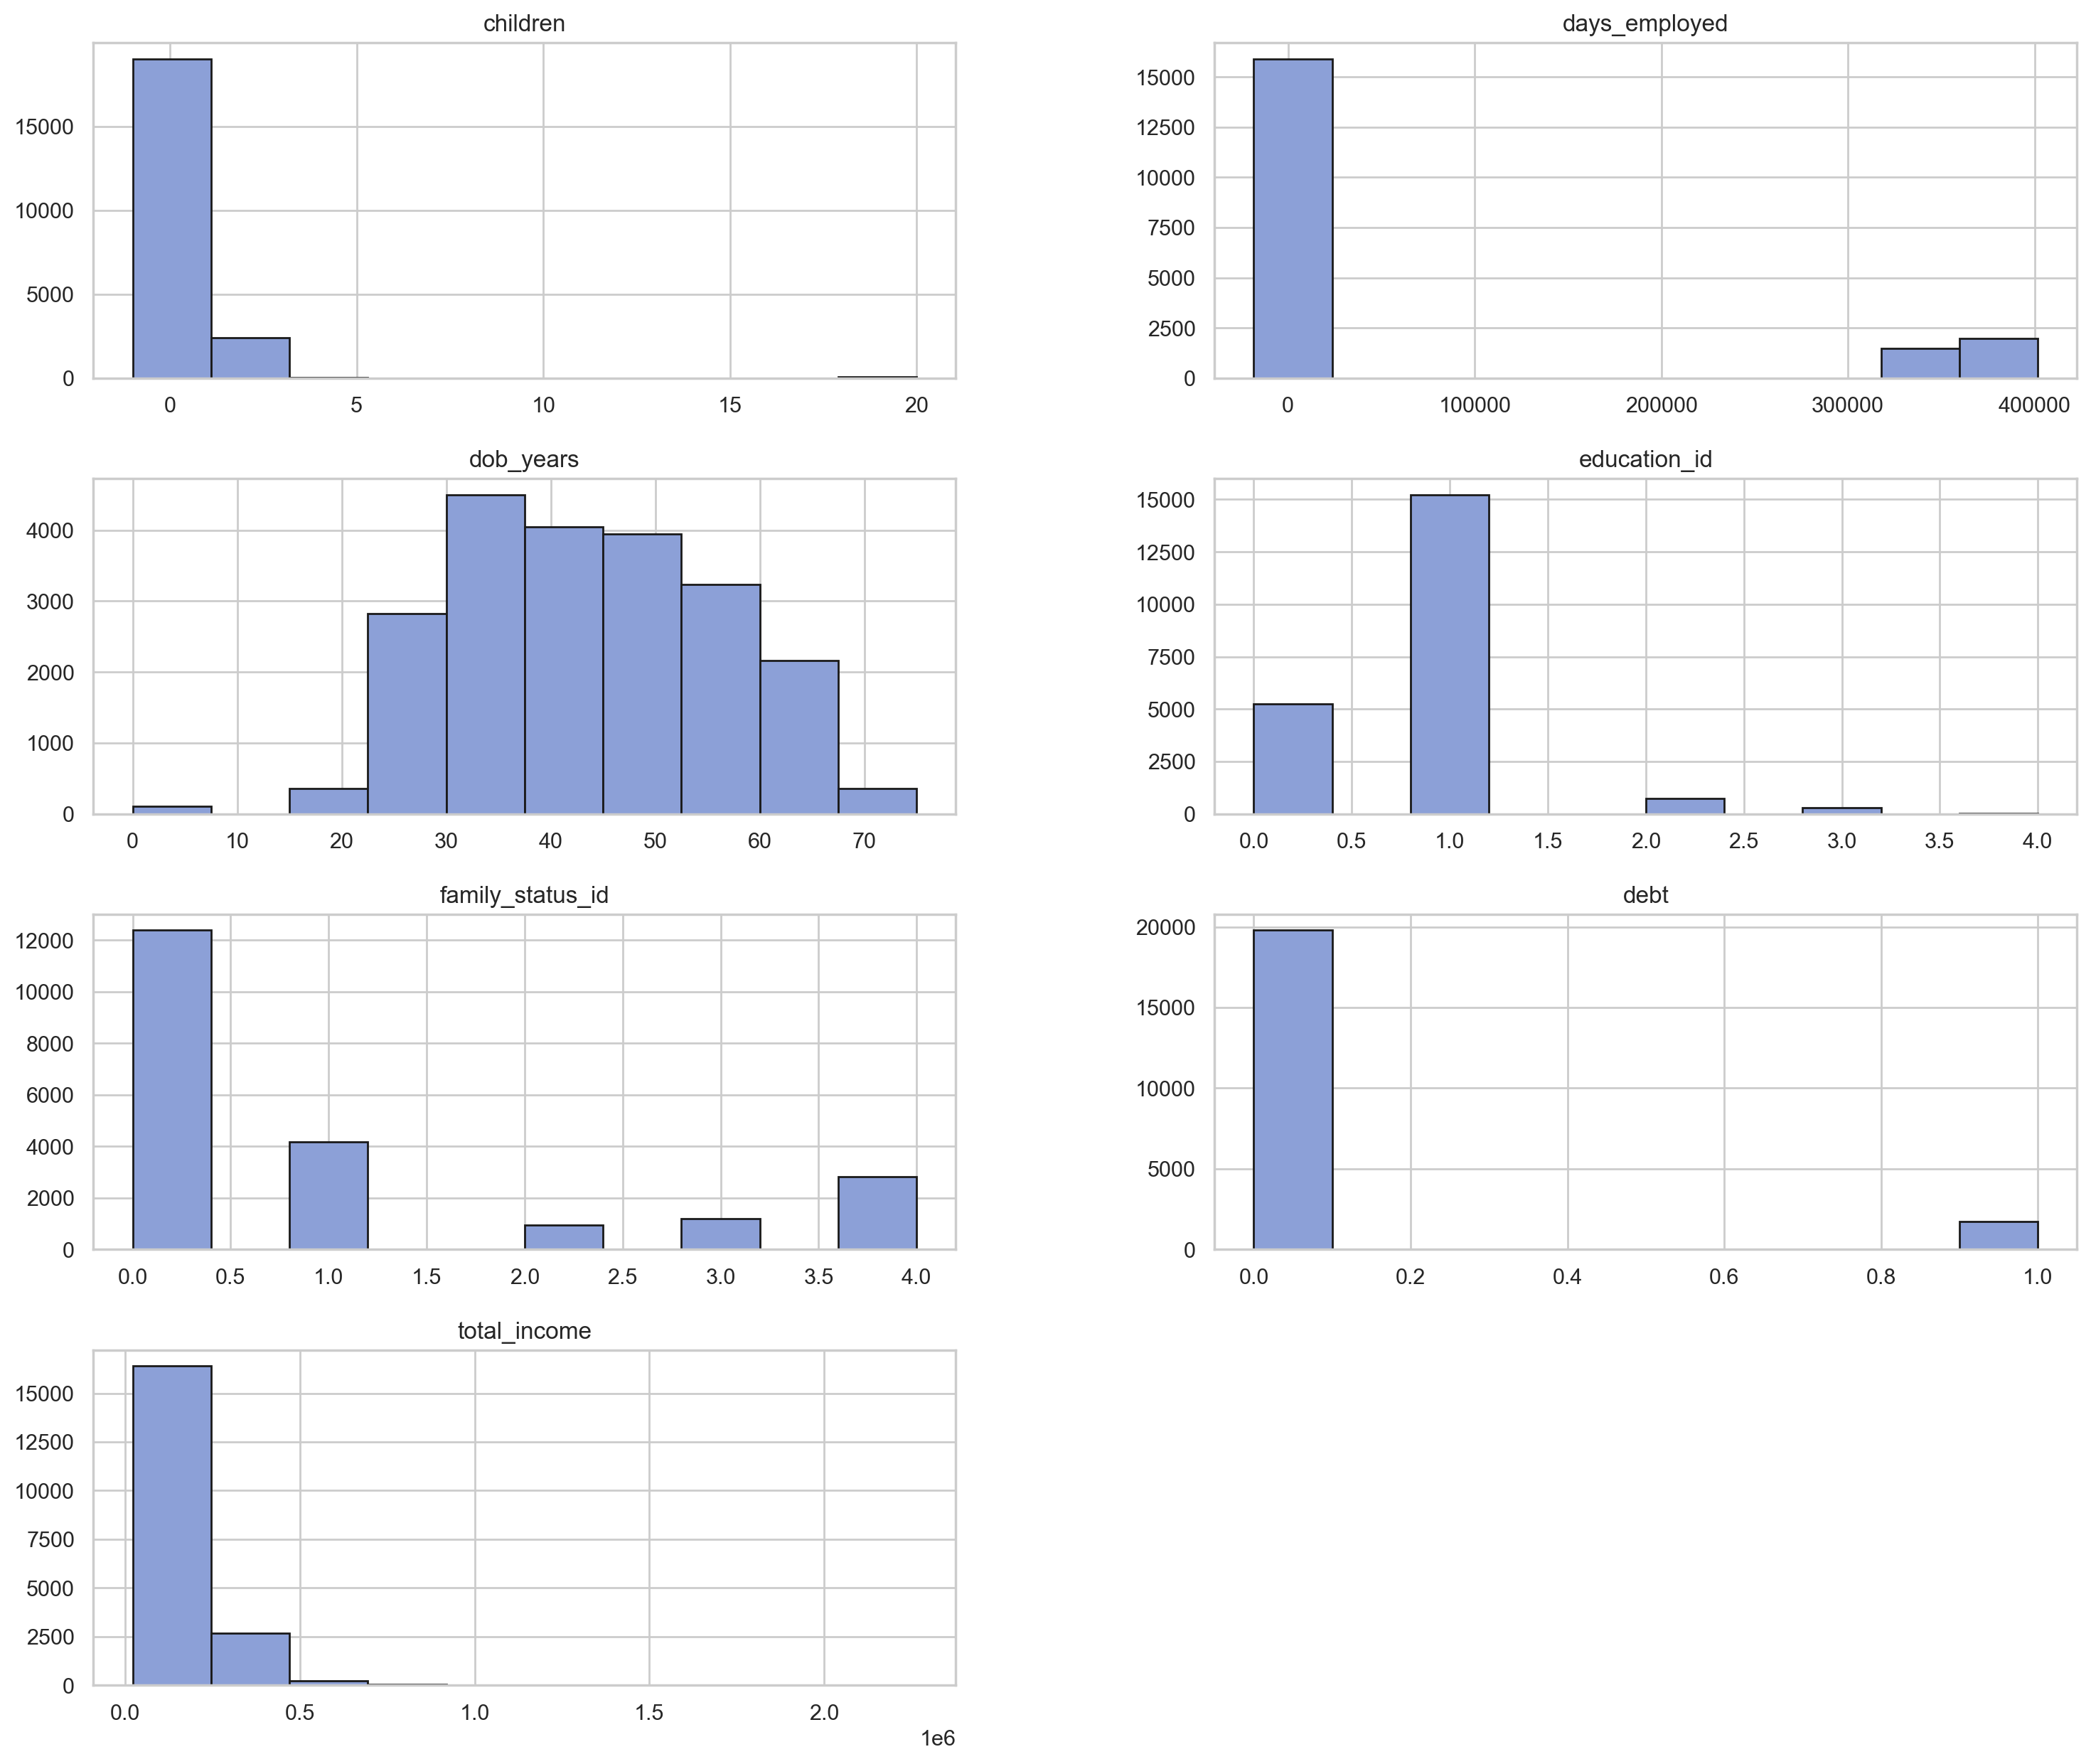

In [9]:
# проверим распределения числовых признаков
data.hist(figsize=(18, 15), layout=(4, 2), color = '#8CA0D7', ec='k')
plt.show()

### Вывод "Изучение данных из файла": 

1. Файл содержит данные по 21525 клиентам, каждый из которых описывается 12-ю признаками (7 количественных и 5 категориальных). Около 10% клиентов имеют задолженность по кредиту.


2. Данные требуют дополнительной предобработки. Необходимы обработка пропущенных значений, изменение типов некоторых данных, удаление дубликатов и обработка аномальных значений. 

## Предобработка данных

На этом этапе:

1. Обработаем пропущенные значения
2. Преобразуем данные в нужные типы
3. Удалим явные дубликаты
4. Обработаем аномальные значения
5. Выполним категоризацию данных

### Обработка пропущенных значений

В двух столбцах есть пропущенные значения:

- `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца income_type.

- `days_employed` —  общий трудовой стаж в днях. Заполним пропуски в этом столбце медианными значениями по каждому типу занятости income_type.

In [10]:
# посмотрим на данные с пропусками в доходах
data[data['total_income'].isna()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


In [11]:
# напишем функцию, которая будет заполнять пропущенные значения по выбранному столбцу медианным значением по каждому типу занятости
column_list = ['total_income', 'days_employed']

def nan_to_median(column_list):
    for t in data['income_type'].unique():
        for column in column_list:
            data.loc[(data['income_type'] == t) & (data[column].isna()), column] = \
            data.loc[(data['income_type'] == t), column].median()
    return data

In [13]:
data = nan_to_median(column_list)

In [15]:
# убедимся, что все пропуски заполнены
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Вывод:**

- Пропущенные значения в доходах и трудовом стаже заполнены медианными значениями по каждому типу занятости.

### Обработка аномальных значений

Наблюдаем аномалии в столбцах:

- `days_employed` - количество дней трудового стажа. Наблюдаем отрицательные значения. Заменим все отрицательные значения положительными. Кроме этого, у двух типов (безработные и пенсионеры) получаются аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится нам для исследования;
- `children` - количество детей. Также встречаются аномальные значения. Удалим строки, в которых встречаются такие аномальные значения.

In [16]:
# заменим все отрицательные значения в столбце days_employed положительными
data['days_employed'] = data['days_employed'].abs()

In [17]:
# для каждого типа занятости выведем медианное значение трудового стажа days_employed в днях
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный       366,413.65
в декрете           3,296.76
госслужащий         2,689.37
компаньон           1,547.38
пенсионер         365,213.31
предприниматель       520.85
сотрудник           1,574.20
студент               578.75
Name: days_employed, dtype: float64

In [18]:
# выведем перечень уникальных значений столбца children
data['children'].unique().tolist()

[1, 0, 3, 2, -1, 4, 20, 5]

In [19]:
# удалим строки, в которых встречаются аномальные значения из датафрейма data
data = data[(data['children'] != -1) & (data['children'] != 20)]
data['children'].unique().tolist()

[1, 0, 3, 2, 4, 5]

In [20]:
# заменим вещественный тип данных в столбце total_income на целочисленный
data['total_income'] = data['total_income'].astype(int)
data['total_income'].dtype

dtype('int32')

### Обработка дубликатов

Обработаем неявные дубликаты в столбце education. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру. Проверим также остальные столбцы.

In [21]:
# посмотрим на уникальные значения уровня образования
data['education'].unique().tolist()

['высшее',
 'среднее',
 'Среднее',
 'СРЕДНЕЕ',
 'ВЫСШЕЕ',
 'неоконченное высшее',
 'начальное',
 'Высшее',
 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
 'Неоконченное высшее',
 'НАЧАЛЬНОЕ',
 'Начальное',
 'Ученая степень',
 'УЧЕНАЯ СТЕПЕНЬ',
 'ученая степень']

In [22]:
# приведем все к нижнему регистру
data['education'] = data['education'].str.lower()

In [23]:
# выведем на экран количество строк-дубликатов в данных
print('Количество дубликатов =', data.duplicated().sum())

Количество дубликатов = 71


In [24]:
# удалим такие строки
data = data.drop_duplicates()
print('Количество дубликатов =', data.duplicated().sum())

Количество дубликатов = 0


### Категоризация данных

Добавим в данные два столбца:

- категория дохода:
     - 0–30000 — 'E',
     - 30001–50000 — 'D',
     - 50001–200000 — 'C',
     - 200001–1000000 — 'B',
     - 1000001 и выше — 'A'.
     
     
- цель кредита, куда войдут категории:
    - 'операции с автомобилем',
    - 'операции с недвижимостью',
    - 'проведение свадьбы',
    - 'получение образования'.

In [27]:
# создадим функцию для разделения уровня дохода по категориям
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [28]:
# применим функцию к данным
data['total_income_category'] = data['total_income'].apply(categorize_income)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,"8,437.67",42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,"4,024.80",36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,"5,623.42",33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,"4,124.75",32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,"340,266.07",53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C


In [29]:
# выведем на экран перечень уникальных целей взятия кредита из столбца purpose
data['purpose'].unique().tolist()

['покупка жилья',
 'приобретение автомобиля',
 'дополнительное образование',
 'сыграть свадьбу',
 'операции с жильем',
 'образование',
 'на проведение свадьбы',
 'покупка жилья для семьи',
 'покупка недвижимости',
 'покупка коммерческой недвижимости',
 'покупка жилой недвижимости',
 'строительство собственной недвижимости',
 'недвижимость',
 'строительство недвижимости',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'операции с коммерческой недвижимостью',
 'строительство жилой недвижимости',
 'жилье',
 'операции со своей недвижимостью',
 'автомобили',
 'заняться образованием',
 'сделка с подержанным автомобилем',
 'получение образования',
 'автомобиль',
 'свадьба',
 'получение дополнительного образования',
 'покупка своего жилья',
 'операции с недвижимостью',
 'получение высшего образования',
 'свой автомобиль',
 'сделка с автомобилем',
 'профильное образование',
 'высшее образование',
 'покупка жилья для сдачи',
 'на покупку автомобиля',
 'ремонт жилью',
 '

In [ ]:
# напишем функцию для разделения целей кредитов по категориям
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [31]:
# применим функцию к нашим данным
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,"8,437.67",42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,"4,024.80",36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,"5,623.42",33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,"4,124.75",32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,"340,266.07",53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


### Вывод "Предобработка данных": 

*Анализ пропущенных значений:* 
- В данных наблюдается 2174 пропуска в стобцах 'days_employed' (общий трудовой стаж в днях) и 'total_income' (ежемесячный доход). При этом во всех строках, где есть пропуски, пропущены значения из обоих столбцов. 
- Зависимостей между пропусками и значениями в других столбцах датасета не выявлено. 
- Можно было бы предположить, что клиенты, у которых имеются пропуски в трудовом стаже и ежемесячном доходе, не имеют стажа и никогда не имели дохода. Однако, такие клиенты, вероятно, не получили бы кредит. Также многие из них имеют конкретный тип занятости, который предполагает наличие дохода и трудового стажа.

*Рекомендация:*
- Обратиться в раздел разработки и убедиться, что данные подгружаются корректно. Процент пропущенных значений (около 10%) велик, чтобы утверждать, что дело в человеческом факторе.

## Исследовательский анализ данных

Исследуем:

1. Зависимость между количеством детей и возвратом кредита в срок
2. Зависимость между семейным положением и возвратом кредита в срок
3. Зависимость между уровнем дохода и возвратом кредита в срок
4. Как разные цели кредита влияют на его возврат в срок?

### Анализ зависимости между количеством детей и возвратом кредита в срок

In [33]:
# создадим сводную таблицу с группировкой по количеству детей
# определим для каждой группы процент должников
debt_children_pivot = data.pivot_table(
    index=['children'], 
    columns='debt', 
    values='total_income', 
    aggfunc='count')\
    .assign(credits_count = lambda x: x[1]+x[0])\
    .rename(columns={1:'debtors_count'})\
    .drop(0, axis=1)\
    .assign(debtors_percents=lambda x: round(x['debtors_count']/x['credits_count']*100, 1))\
    .reset_index().rename_axis(None, axis=1)

debt_children_pivot

,children,debtors_count,credits_count,debtors_percents
0,0,"1,063.00","14,091.00",7.50
1,1,444.00,"4,808.00",9.20
2,2,194.00,"2,052.00",9.50
3,3,27.00,330.00,8.20
4,4,4.00,41.00,9.80
5,5,NaN,NaN,NaN


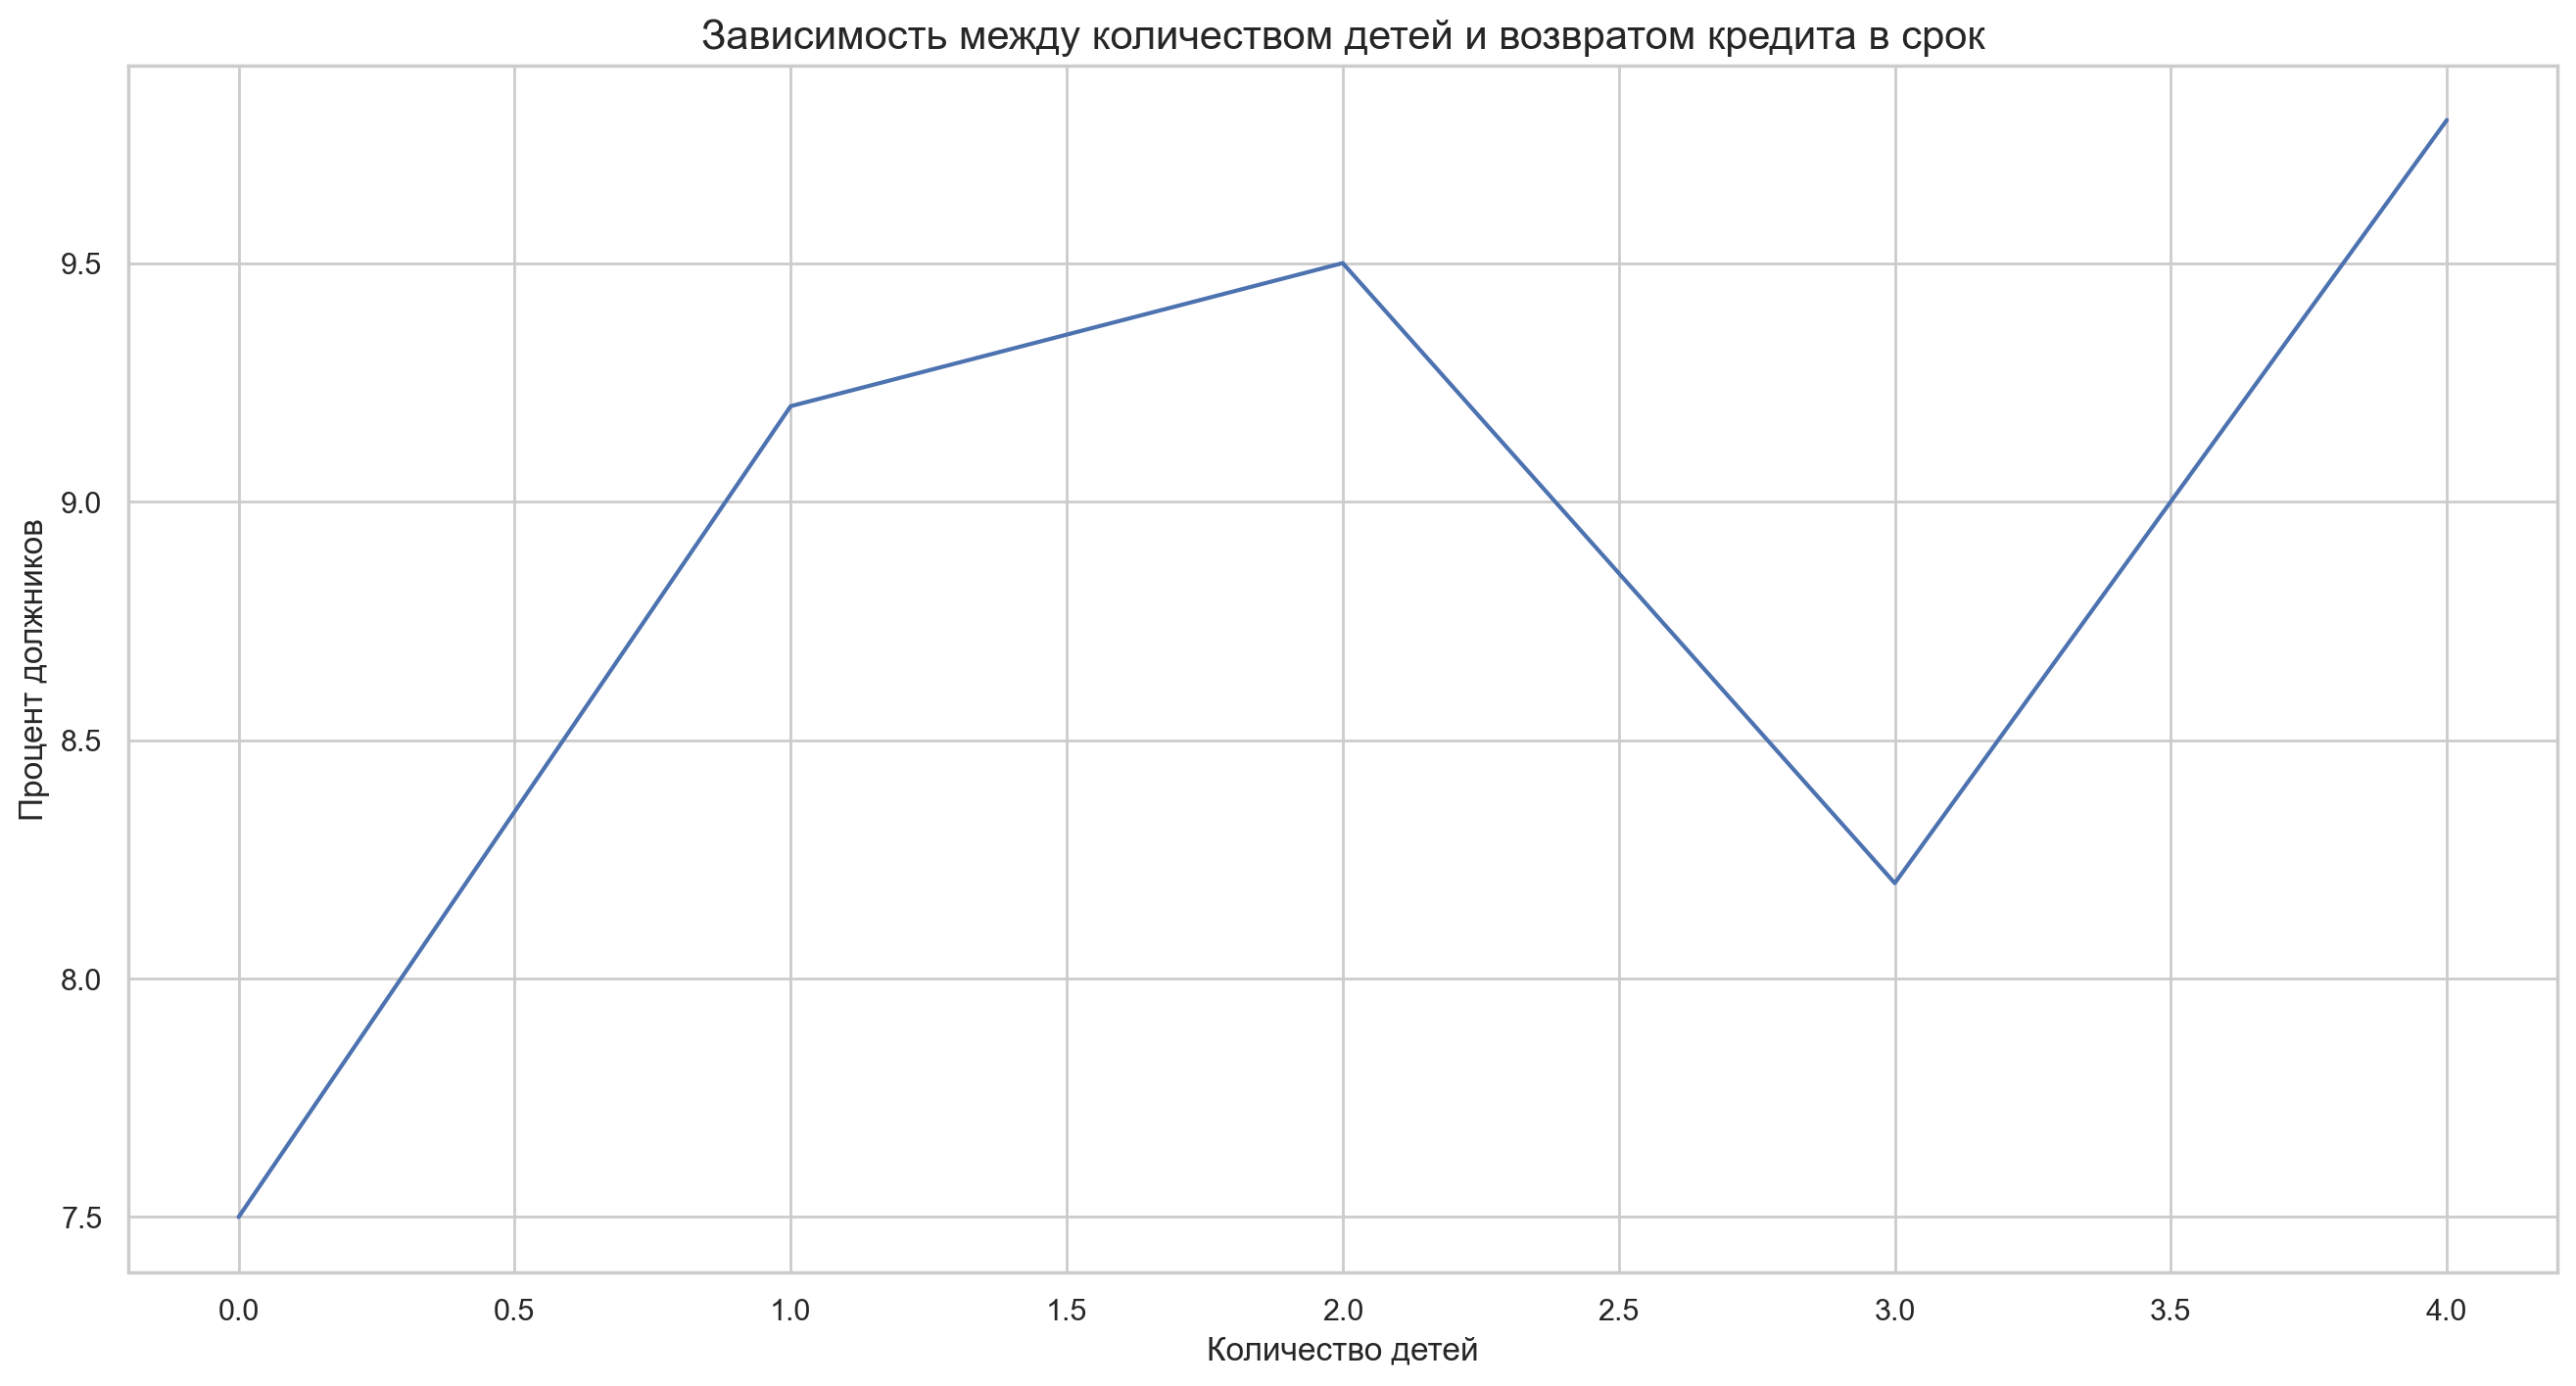

In [34]:
# построим график 
plt.figure(figsize=(16, 8))
sns.lineplot(data=debt_children_pivot, x='children', y='debtors_percents', markers=True)
plt.title('Зависимость между количеством детей и возвратом кредита в срок', fontsize=15)
plt.xlabel('Количество детей', fontsize=12)
plt.ylabel('Процент должников', fontsize=12)
plt.show()

**Вывод:** 

- Из сводной таблицы видим, что кредитополучатели 'без детей' являются более ответственными, чем клиенты, у которых есть дети. Видимо, наличие ребенка накладывает на клиента дополнительные финансовое бремя (обязательства) и клиенты либо менее ответственно относятся к своим кредитным обязательствам, либо не имеют возможности в срок оплачивать обязательства. 


- С увеличением количества детей возрастает и процент людей, имеющих задолженность по кредиту. Исключение составляет группа с '3-мя детьми'. В этой группе процент задолженностей ниже, чем у группы с одним ребенком, но выше, чем у группы без детей.


- По некоторым группам заемщиков (от 3-х детей и выше) у нас недостаточно данных - выборка не сбалансирована, классы в выборке имеют разные размеры. Рекомендуется провести дополнительное исследование на большей выборке данных.

### Анализ зависимости между семейным положением и возвратом кредита в срок

In [35]:
# создадим сводную таблицу с группировкой по семейному статусу
# определим для каждой группы процент должников
debt_family_status_pivot = data.pivot_table(
    index=['family_status_id', 'family_status'], 
    columns='debt', 
    values='total_income', 
    aggfunc='count')\
    .assign(credits_count = lambda x: x[1]+x[0])\
    .rename(columns={1:'debtors_count'})\
    .drop(0, axis=1)\
    .assign(debtors_percents=lambda x: round(x['debtors_count']/x['credits_count']*100, 1))\
    .reset_index().rename_axis(None, axis=1)

debt_family_status_pivot

,family_status_id,family_status,debtors_count,credits_count,debtors_percents
0,0,женат / замужем,927,12261,7.60
1,1,гражданский брак,385,4134,9.30
2,2,вдовец / вдова,63,951,6.60
3,3,в разводе,84,1189,7.10
4,4,Не женат / не замужем,273,2796,9.80


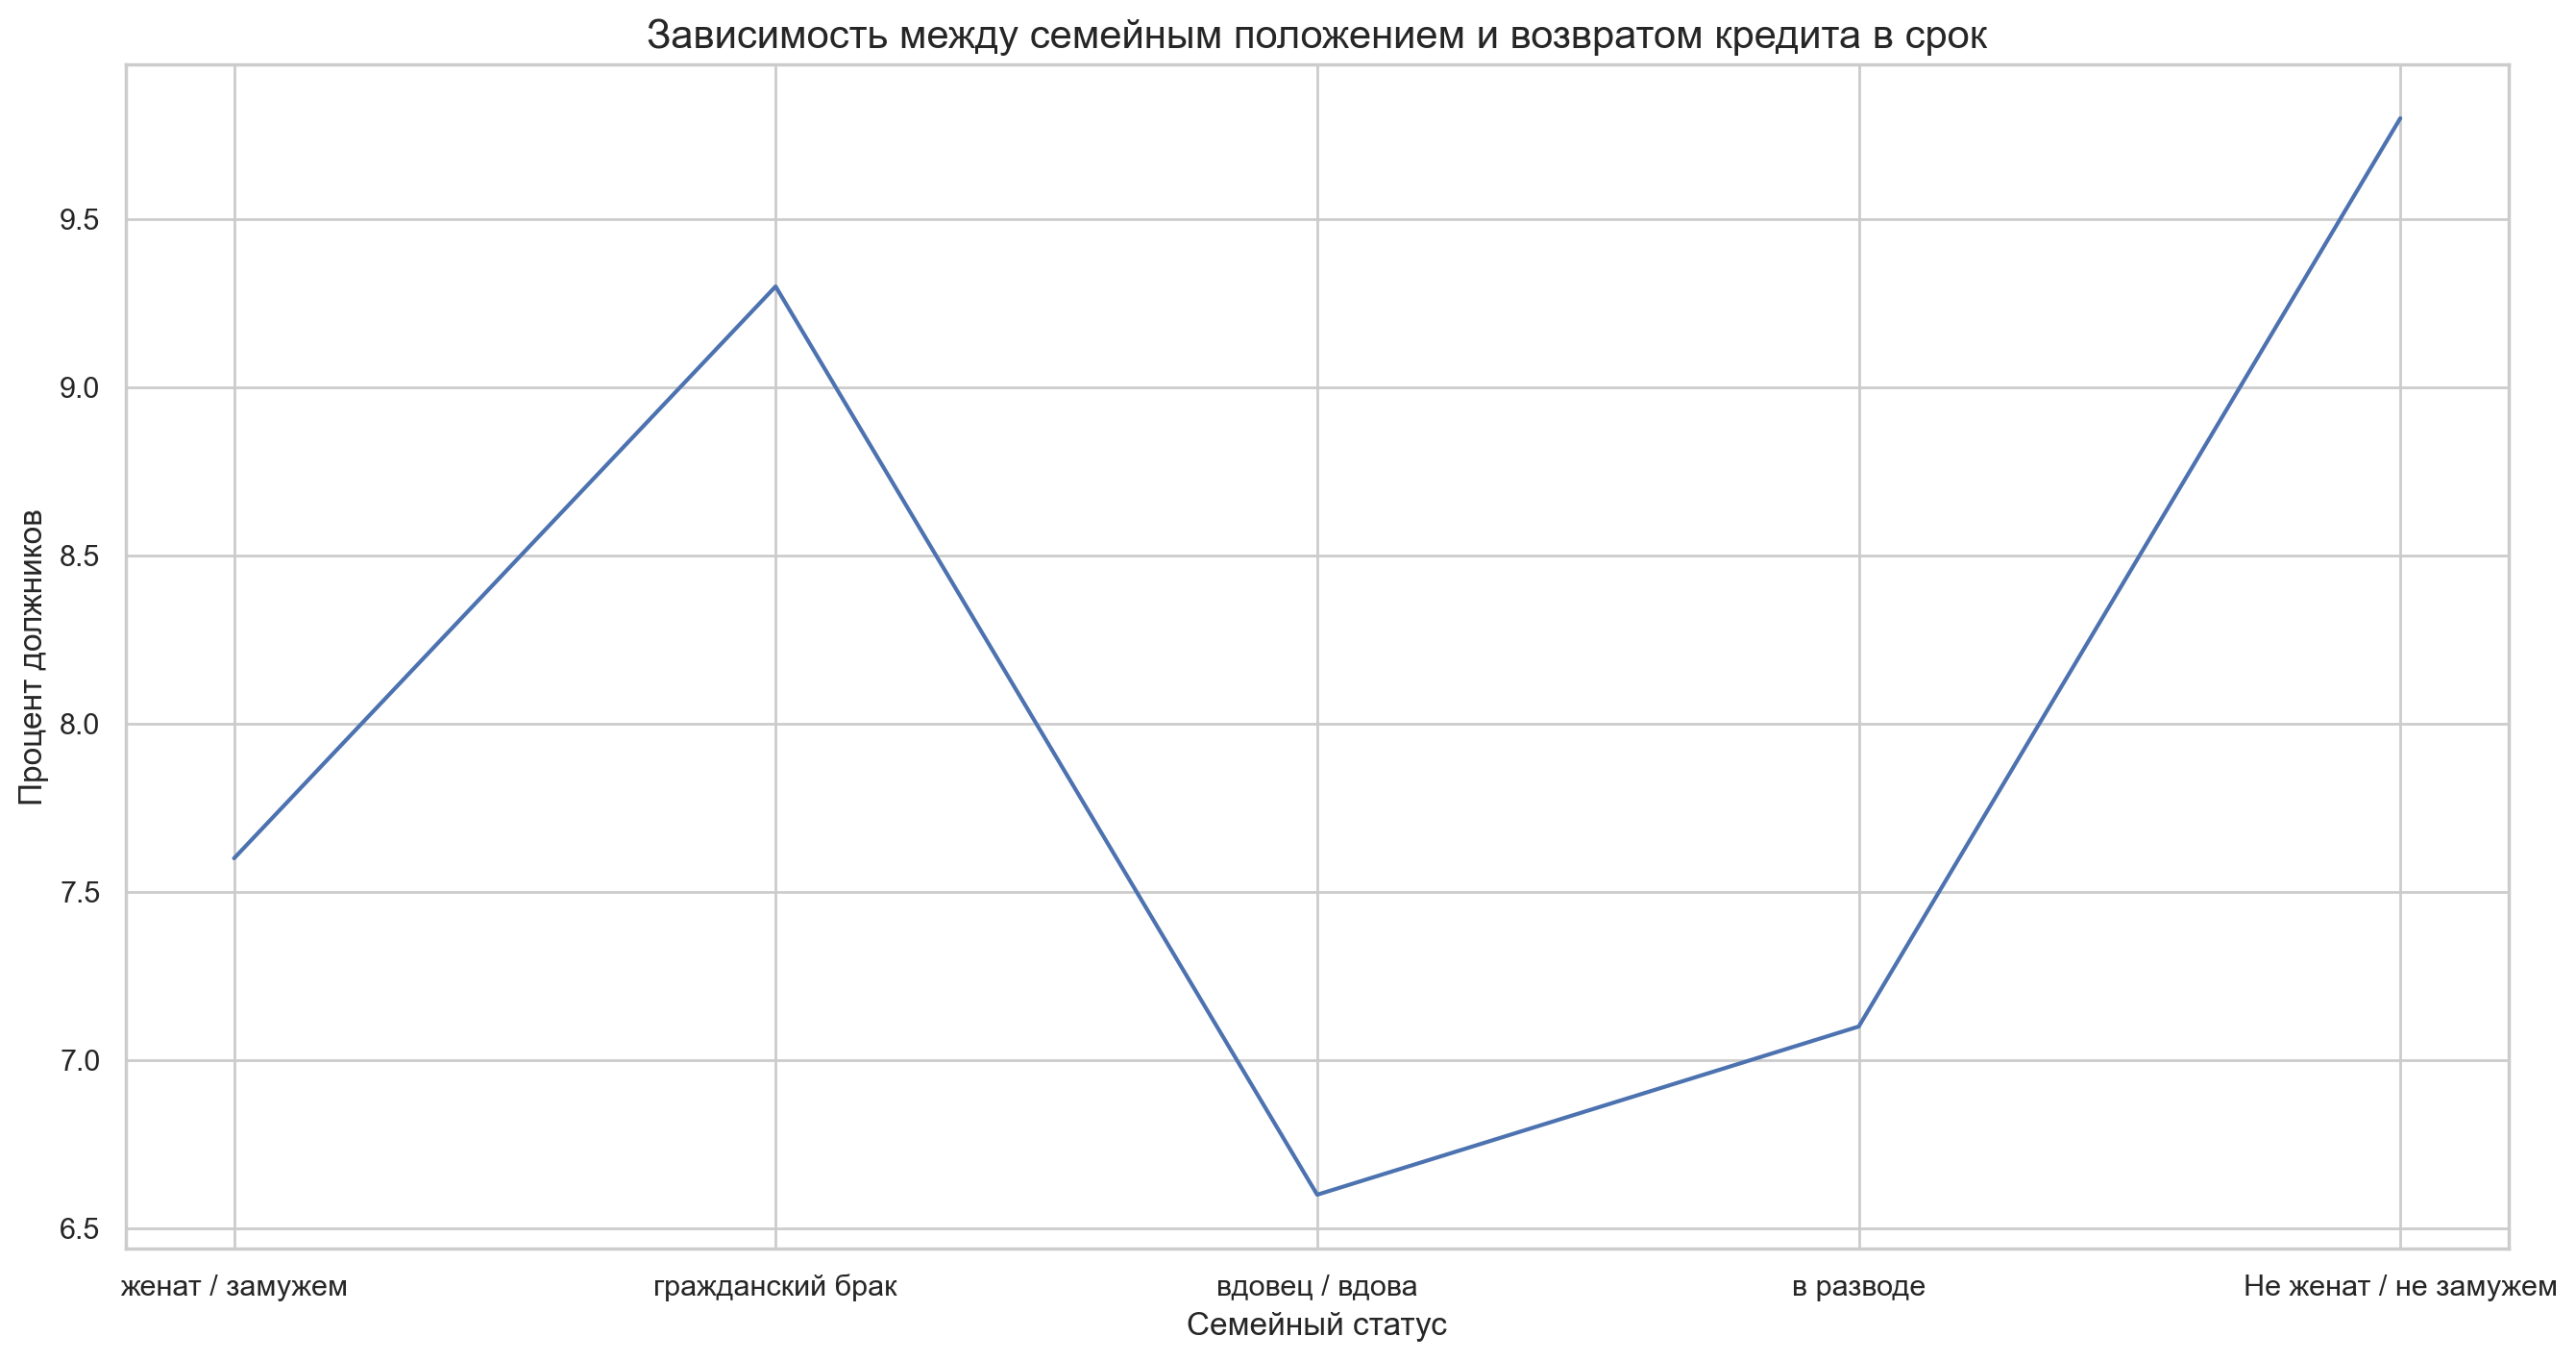

In [36]:
# построим график 
plt.figure(figsize=(16, 8))
sns.lineplot(data=debt_family_status_pivot, x='family_status', y='debtors_percents', markers=True)
plt.title('Зависимость между семейным положением и возвратом кредита в срок', fontsize=15)
plt.xlabel('Семейный статус', fontsize=12)
plt.ylabel('Процент должников', fontsize=12)
plt.show()

**Вывод:** 

- Из сводной таблицы видим, что самый низкий процент невозврата кредита в срок у групп с семейным статусом '2 - вдовец/вдова' и '3 - в разводе'. Самый высокий процент невозврата кредита в срок у групп с семейным статусом '1 - гражданский брак' и '4 - не женат/не замужем'


- Кредитному отделу следует с осторожностью относиться к клиентам, которые не состоят или не состояли в браке. Согласно данным такие клиенты менее ответственные.

### Анализ зависимости между уровнем дохода и возвратом кредита в срок

In [38]:
# создадим сводную таблицу с группировкой по уровню дохода
# определим для каждой группы процент должников
debt_income_category_pivot = data.pivot_table(
    index=['total_income_category'], 
    columns='debt', 
    values='total_income', 
    aggfunc='count')\
    .assign(credits_count = lambda x: x[1]+x[0])\
    .rename(columns={1:'debtors_count'})\
    .drop(0, axis=1)\
    .assign(debtors_percents=lambda x: round(x['debtors_count']/x['credits_count']*100, 1))\
    .reset_index().rename_axis(None, axis=1)

debt_income_category_pivot

,total_income_category,debtors_count,credits_count,debtors_percents
0,A,2,25,8.00
1,B,354,5014,7.10
2,C,1353,15921,8.50
3,D,21,349,6.00
4,E,2,22,9.10


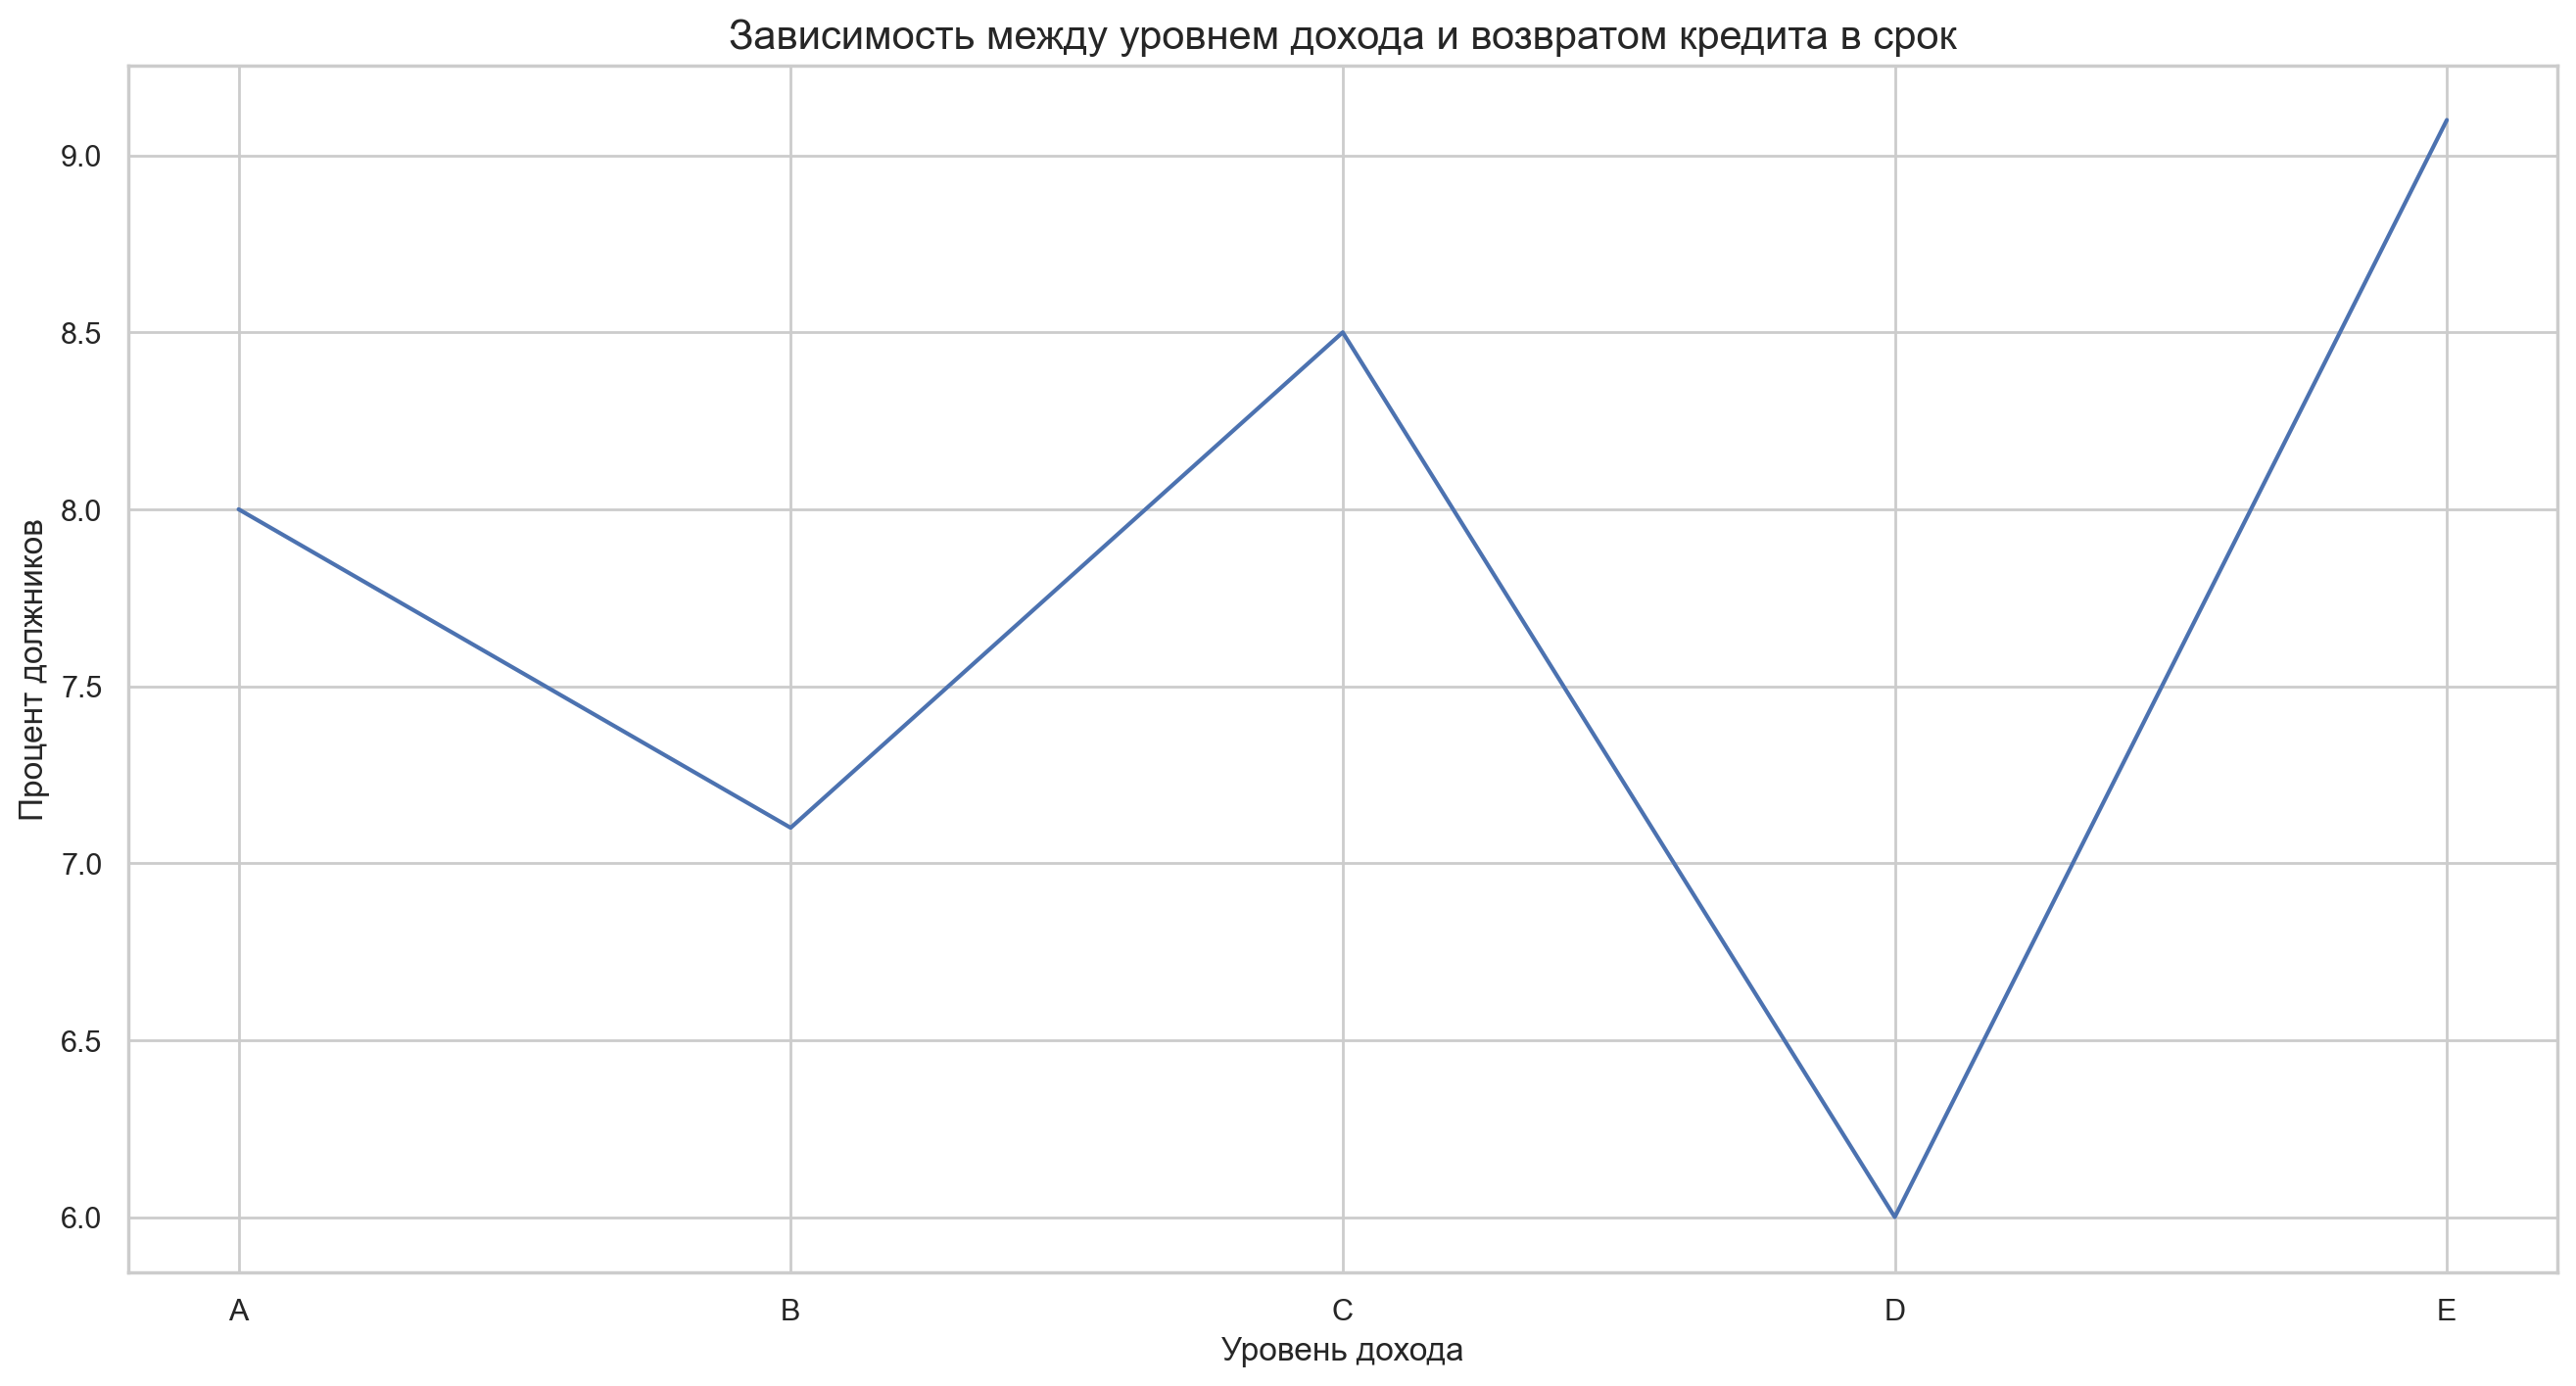

In [39]:
# построим график 
plt.figure(figsize=(16, 8))
sns.lineplot(data=debt_income_category_pivot, x='total_income_category', y='debtors_percents', markers=True)
plt.title('Зависимость между уровнем дохода и возвратом кредита в срок', fontsize=15)
plt.xlabel('Уровень дохода', fontsize=12)
plt.ylabel('Процент должников', fontsize=12)
plt.show()

**Вывод:** 

- Выборка по заемщикам с наименьшим ('E - до 30000') и с наибольшим доходом ('А - от 1000001') недостаточна для формирования однозначных выводов.


- По результатам анализа трех других групп заемщиков - прямой зависимости между уровнем дохода и возвратом кредита в срок не наблюдается. Самый низкий процент невозврата кредита в срок у групп 'D - 30001–50000' и 'B - 200001–1000000'. 


- Получается, что материальный достаток - не единственная переменная, которая влияет на качество кредитной истории. Однако 2174 пропуска в данных столбца "total_income" ставят под сомнение полученный нами результат. Сводная таблица с данными о зависимости между уровнем дохода и возвратом кредита в срок, возможно, могла бы выглядеть иначе, если бы не пропущенные данные.

### Анализ зависимости между целью кредита и возвратом кредита в срок

In [40]:
# создадим сводную таблицу с группировкой по цели кредита
# определим для каждой группы процент должников
debt_purpose_category_pivot = data.pivot_table(
    index=['purpose_category'], 
    columns='debt', 
    values='total_income', 
    aggfunc='count')\
    .assign(credits_count = lambda x: x[1]+x[0])\
    .rename(columns={1:'debtors_count'})\
    .drop(0, axis=1)\
    .assign(debtors_percents=lambda x: round(x['debtors_count']/x['credits_count']*100, 1))\
    .reset_index().rename_axis(None, axis=1)

debt_purpose_category_pivot

,purpose_category,debtors_count,credits_count,debtors_percents
0,операции с автомобилем,400,4279,9.30
1,операции с недвижимостью,780,10751,7.30
2,получение образования,369,3988,9.30
3,проведение свадьбы,183,2313,7.90


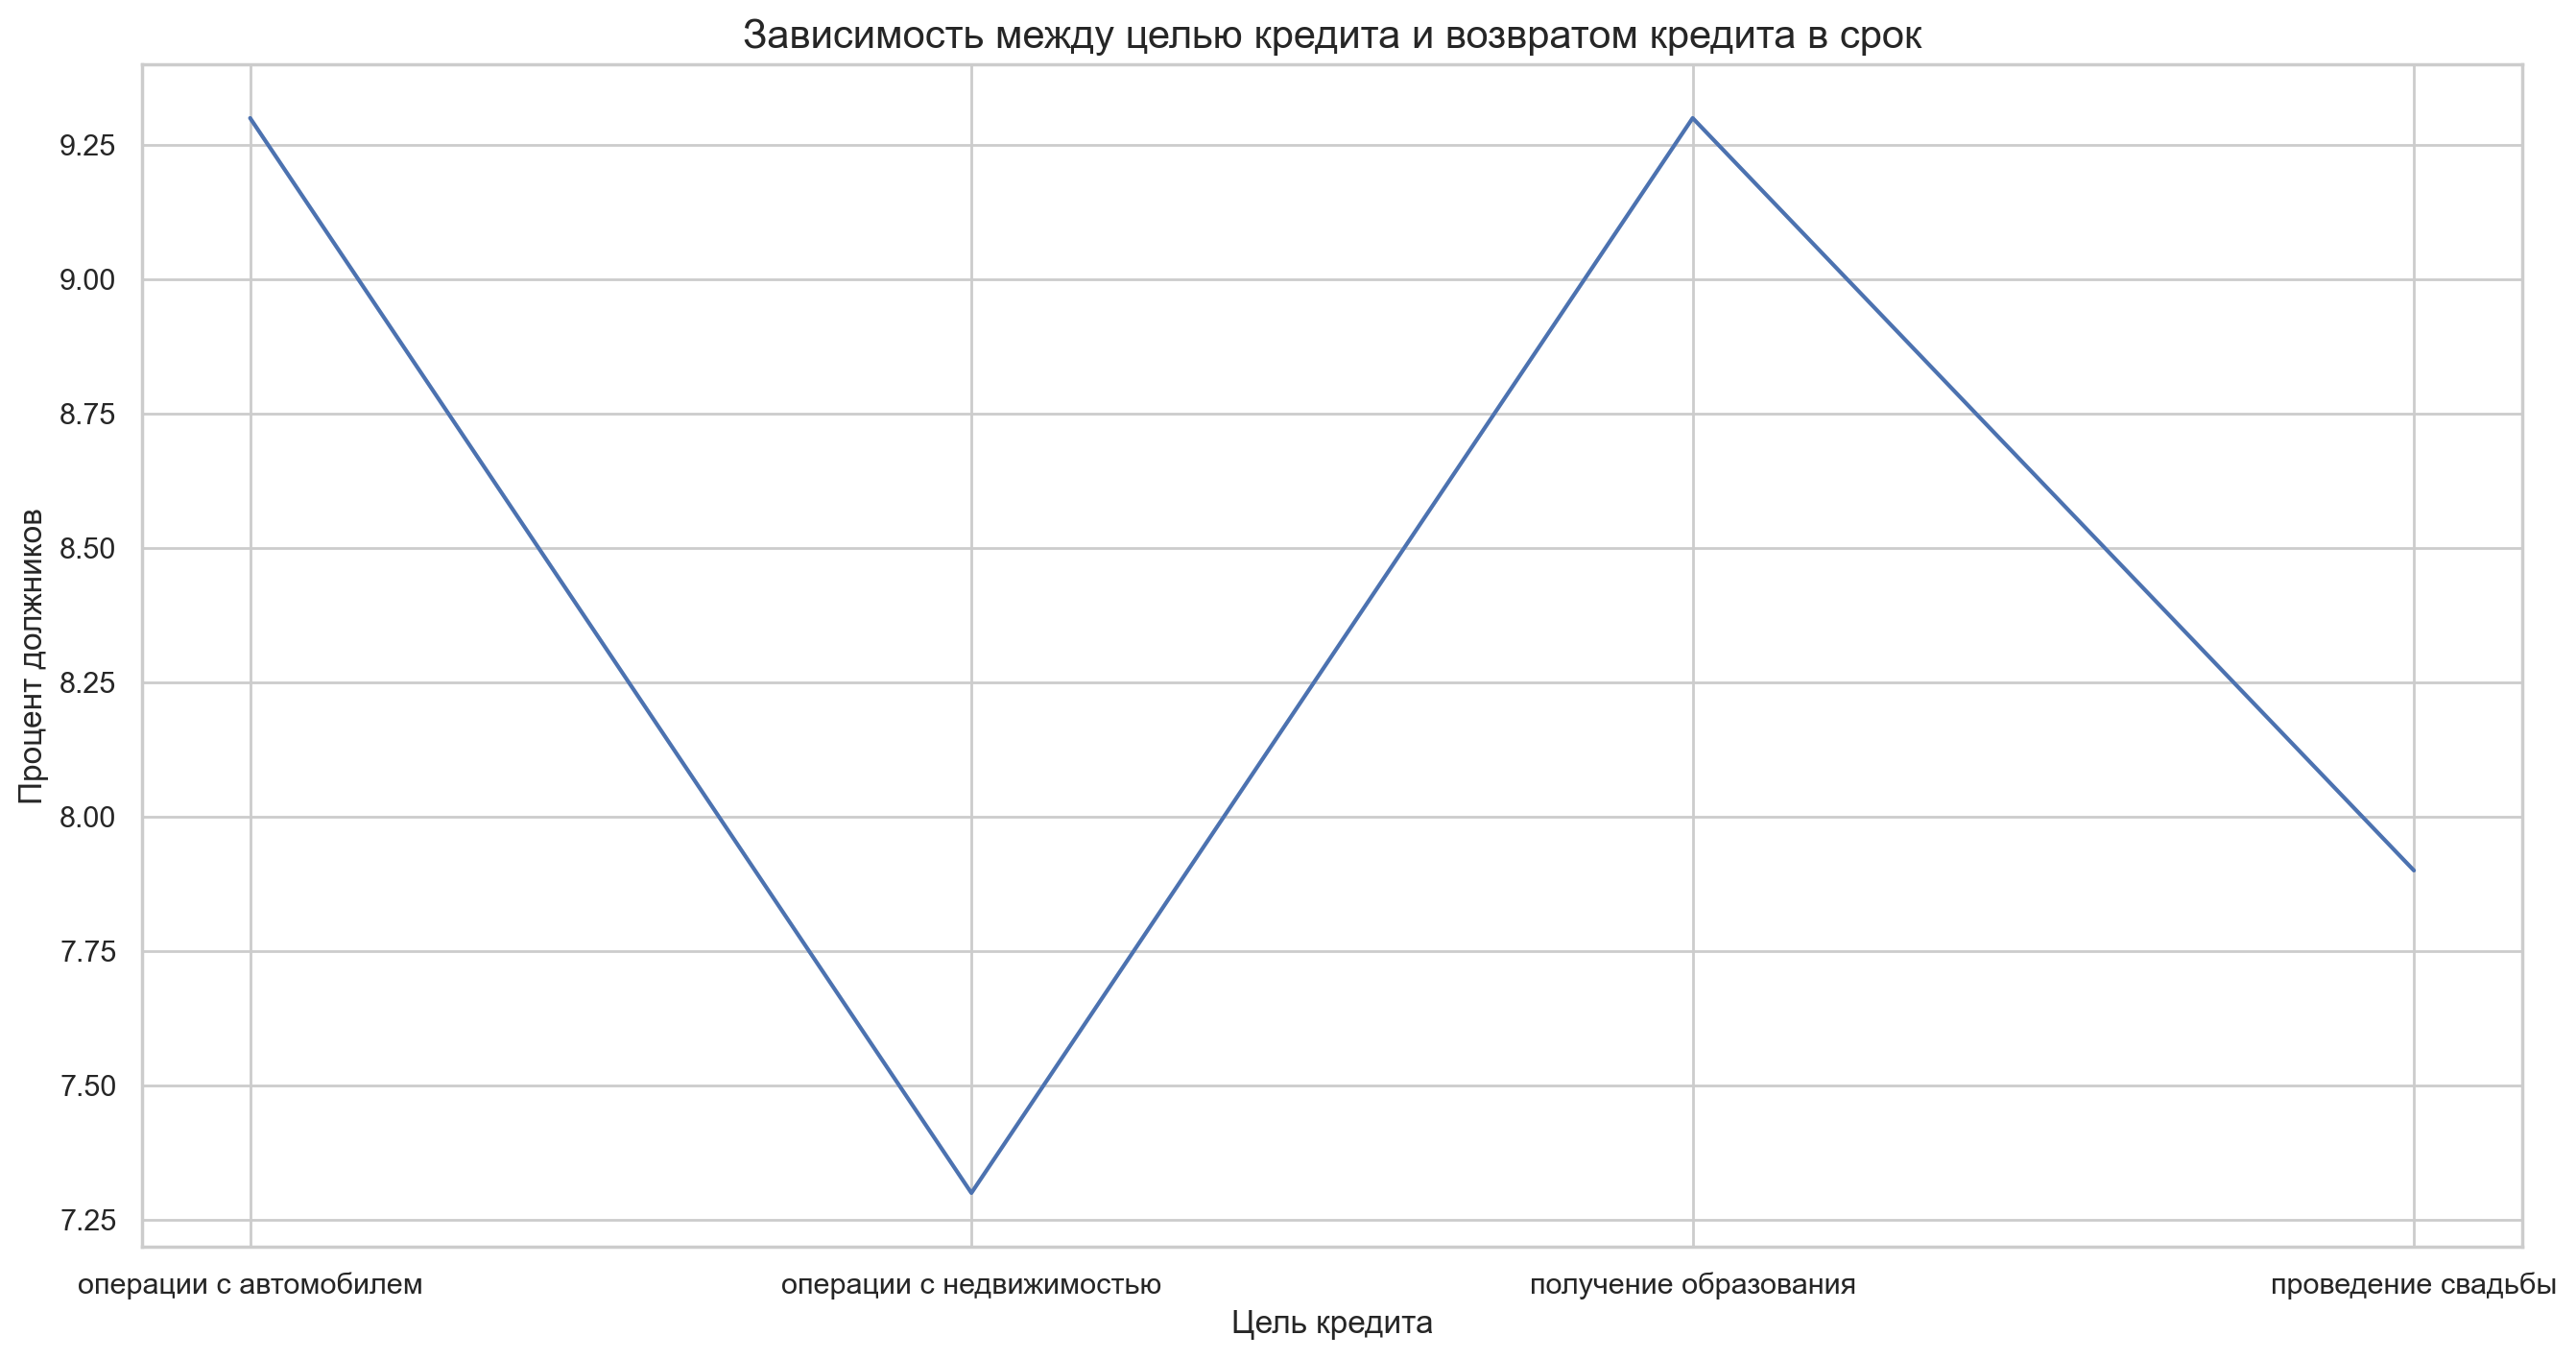

In [41]:
# построим график 
plt.figure(figsize=(16, 8))
sns.lineplot(data=debt_purpose_category_pivot, x='purpose_category', y='debtors_percents', markers=True)
plt.title('Зависимость между целью кредита и возвратом кредита в срок', fontsize=15)
plt.xlabel('Цель кредита', fontsize=12)
plt.ylabel('Процент должников', fontsize=12)
plt.show()

**Вывод:** 
- Самый высокий процент невозврата кредита в срок у категорий 'операции с автомобилем' и 'получение образования'.

- Самый низкий процент невозврата кредита в срок у категории 'операции с недвижимостью'.

### Вывод "Исследовательский анализ данных": 

Были исследованы следующие зависимости:

1. Зависимость между количеством детей и возвратом кредита в срок
2. Зависимость между семейным положением и возвратом кредита в срок
3. Зависимость между уровнем дохода и возвратом кредита в срок
4. Как разные цели кредита влияют на его возврат в срок?

## Общий вывод

Цель настоящего исследования - выявить влияние разных факторов на факт погашения кредита в срок. Заказчик — кредитный отдел банка. Входные данные от банка — статистика о платёжеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

В исследовании были проверены следующие гипотезы:

- Гипотеза 1 - количество детей влияет на факт погашения кредита в срок;
- Гипотеза 2 - семейное полодение влияет на факт погашения кредита в срок;
- Гипотеза 3 - уровень дохода влияет на факт возврата кредита в срок;
- Гипотеза 4 - цель кредита влияет на факт возврата кредита в срок.

В результате исследования удалось выявить следующие зависимости:


**Гипотеза 1 частично подтверждена:** **для более точных выводов необходимо больше данных по клиентам с 3, 4 и 5 детьми*

- `7.5%` - доля просроченных кредитов у заемщиков без детей;
- `9.2%` - доля просроченных кредитов у заемщиков с 1 ребенком;
- `9.5%` - доля просроченных кредитов у заемщиков с 2 детьми.

По результатам исследования можно сделать вывод, что кредитополучатели без детей являются более ответственными, чем клиенты, у которых есть дети. Возможно, наличие ребенка накладывает на клиента дополнительные финансовые обязательства и клиенты либо менее ответственно относятся к своим кредитным обязательствам, либо не имеют возможности в срок оплачивать обязательства.

*Рекомендация: Провести дополнительное исследование на большей выборке данных.*

**Гипотеза 2 подтверждена:**

- `6.6%`,  `7.1%`, `7.6%` - доли просроченных кредитов у заемщиков с семейным статусом "вдовец/вдова", "в разводе" и "женат/замужем" соответственно;
- `9.3%`,  `9.8%` - доли просроченных кредитов у заемщиков с семейным статусом "гражданский брак" и "не женат/не замужем" соответственно.

По результатам исследования можно сделать вывод, что кредитному отделу следует с осторожностью относиться к клиентам, которые не состоят или не состояли в браке. Согласно данным такие клиенты менее ответственные. Вероятно, узаконенные отношения (включая и бывшие отношения) ведут к более ответственному отношению к своим обязательствам.

**Гипотеза 3 не подтверждена:** **для более точных выводов необходимо больше данных по клиентам с уровнем дохода Е (до 30.000) и А (от 1.000.001) и восстановление пропущенных значений в данных столбца "total_income"*

- `6.0%` - доля просроченных кредитов у заемщиков с уровнем дохода D (от 30.001 до 50.000);
- `8.5%` - доля просроченных кредитов у заемщиков с уровнем дохода С (от 50.001 до 200.000);
- `7.1%` - доля просроченных кредитов у заемщиков с уровнем дохода В (от 200.001 до 1.000.000).

По результатам исследования можно сделать вывод, что зависимость между уровнем дохода и возвратом кредита в срок отсутствует. Вероятно, материальный достаток - не единственная переменная, которая влияет на качество кредитной истории.

*Рекомендация: Провести дополнительное исследование на большей выборке данных.*

**Гипотеза 4 подтверждена:**

- `7.3%` - доля просроченных кредитов, целью которых были операции с недвижимостью;
- `7.9%` - доля просроченных кредитов, целью которых было проведение свадьбы;
- `9.3%` - доля просроченных кредитов, целью которых были операции с автомобилем.
- `9.3%` - доля просроченных кредитов, целью которых было получение образования.

По результатам исследования можно сделать вывод, что кредитному отделу следует с осторожностью относиться к клиентам, которые берут кредит на покупку автомобиля или получение образования.

**Общие рекомендации:**

1. Специалистам, которые занимаются построением модели кредитного скоринга, можно использовать зависимости из второй и четвертой гипотезы (семейное положение и цель кредита).
2. Необходимо собрать более полную выборку для повторной проверки первой и третей гипотез.